In [1]:
import rasterio
import torch
import os
from rasterio.plot import reshape_as_image
import rasterio.mask
from rasterio.features import rasterize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import mapping, Point, Polygon
from shapely.ops import cascaded_union





In [2]:
import yacs

In [4]:
from HRNet.lib.models.hrnet import hrnet32
model = hrnet32(pretrained=False, progress=True, channels=4)
model.load_state_dict(torch.load('HRNet/HighResolutionNet32_none_15_nir_tci_multitemporal.pth',map_location=torch.device('cpu')))

<All keys matched successfully>

In [4]:
train_df = gpd.read_file("TILES/20160913_074800_0e0e/labels.shp")
print(len(train_df))
train_df.head(5)

698


,2016091,geometry
0,None,"POLYGON ((35.00321 49.93618, 35.00464 49.93625..."
1,None,"POLYGON ((35.01351 49.93417, 35.01410 49.93387..."
2,None,"POLYGON ((35.02544 49.93543, 35.02598 49.93552..."
3,None,"POLYGON ((35.02703 49.93557, 35.02740 49.93547..."
4,None,"POLYGON ((35.02970 49.93492, 35.03164 49.93440..."


In [9]:
tiff_path = '20160913_074800_0e0e/20160913_074800_0e0e_3B_AnalyticMS.tif'

In [10]:
with rasterio.open(tiff_path, "r") as src:
    raster_img = src.read()
    raster_meta = src.meta

In [11]:
raster_img = reshape_as_image(raster_img)

In [13]:
raster_img=raster_img/np.max(raster_img)

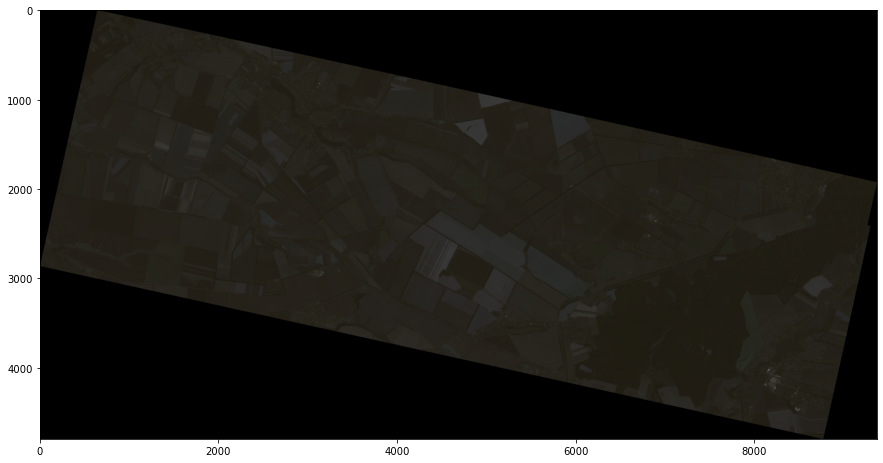

In [18]:
plt.figure(figsize=(15,15))
plt.imshow(raster_img[:,:,:3])

In [5]:
def poly_from_utm(polygon, transform):
    poly_pts = []
    
    # make a polygon from multipolygon
    poly = cascaded_union(polygon)
    for i in np.array(poly.exterior.coords):
        poly_pts.append(~transform * tuple(i))
    new_poly = Polygon(poly_pts)
    return new_poly



poly_shp = []
im_size = (src.meta['height'], src.meta['width'])
for num, row in train_df.iterrows():
    if row['geometry'].geom_type == 'Polygon':
        poly = poly_from_utm(row['geometry'], src.meta['transform'])
        poly_shp.append(poly)
    else:
        for p in row['geometry']:
            poly = poly_from_utm(p, src.meta['transform'])
            poly_shp.append(poly)

mask = rasterize(shapes=poly_shp,
                 out_shape=im_size)


NameError: name 'src' is not defined

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(mask)